In [ ]:
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandasql import sqldf


In [ ]:
! pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=4099f9187a3b23bdc9ce9cf07aee8046ed82e94d2cf6e66597d1ea67a9085c45
  Stored in directory: /root/.cache/pip/wheels/68/5d/a5/edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql


In [ ]:
df=pd.read_excel('/content/online_retail_II.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  525461 non-null  object 
 7   Country      525461 non-null  object 
 8   InvoiceYear  525461 non-null  int32  
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 34.1+ MB


In [ ]:
df.describe()

,Quantity,Price,InvoiceYear
count,525461.000000,525461.000000,525461.000000
mean,10.337667,4.688834,2009.913927
std,107.424110,146.126914,0.280472
min,-9600.000000,-53594.360000,2009.000000
25%,1.000000,1.250000,2010.000000
50%,3.000000,2.100000,2010.000000
75%,10.000000,4.210000,2010.000000
max,19152.000000,25111.090000,2010.000000


In [ ]:
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
lst=df.columns

In [ ]:
lst=list(lst)

In [ ]:
lst

['Invoice',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country']

### **Bifurcate all the columns based on their DataTypes.**

In [ ]:
integer_columns = list(df.select_dtypes(include=['int64']).columns )
float_columns = list(df.select_dtypes(include=['float64']).columns )
object_columns =list(df.select_dtypes(include=['object']).columns)
date_columns=list(df.select_dtypes(include=['datetime64']).columns)

In [ ]:
integer_columns

['Quantity']

In [ ]:
float_columns

['Price', 'Customer ID']

In [ ]:
object_columns

['Invoice', 'StockCode', 'Description', 'Country']

In [ ]:
date_columns

['InvoiceDate']

### **Change DataTypes**

In [ ]:
convert_dict = {'Customer ID': str,'Country':str}
df = df.astype(convert_dict)

## **Analyze the Variance  of Quantity and Price distribution in top ten countries**

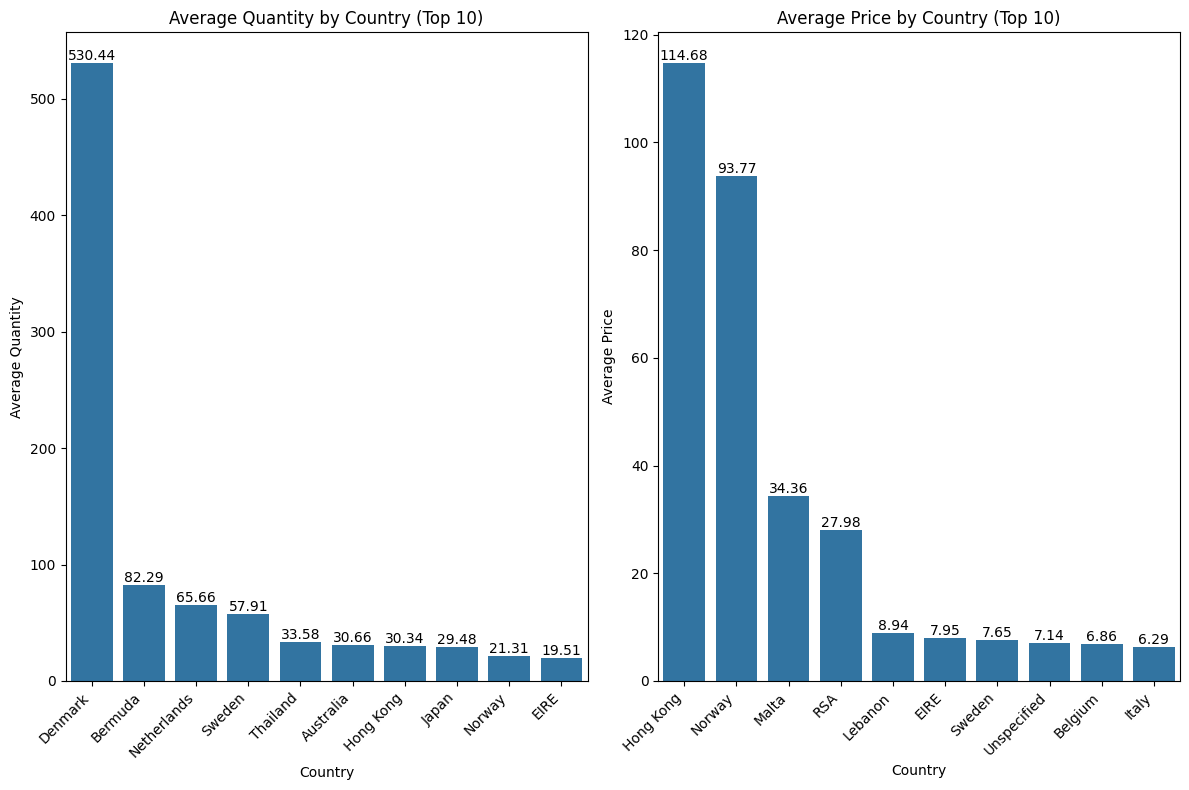

In [ ]:
# prompt: Plot bar plot for Quantity and Price In top ten countries in the same plot  with data label and tool tips using seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded as in the provided code
# ... (previous code to load and preprocess the dataframe)
df_cnt=df.groupby('Country').agg({"Quantity":"mean"}).sort_values(by='Quantity',ascending=False).head(10)

# Calculate average price for the top 10 countries
df_price = df.groupby('Country').agg({"Price":"mean"}).sort_values(by='Price', ascending=False).head(10)

#
#df_ctry_count = df.groupby('Country').agg({"Customer ID":"count"}).sort_values(by='Customer ID', ascending=False).head(10)
df_ctry_count = df.groupby('Country')['Customer ID'].count().reset_index().sort_values(by = 'Customer ID',ascending = False).head(10)

# Create the combined plot
plt.figure(figsize=(12, 8))

# Subplot for Quantity
plt.subplot(1, 2, 1)
ax1 = sns.barplot(x=df_cnt.index, y='Quantity', data=df_cnt)
plt.title('Average Quantity by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Quantity')
plt.xticks(rotation=45, ha='right')

for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Subplot for Price
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x=df_price.index, y='Price', data=df_price)
plt.title('Average Price by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')





plt.tight_layout()
plt.show()


In [ ]:

import plotly.express as px
# Calculate the top 10 customers by quantity
top_customers = df.groupby(['Customer ID','Country'])['Quantity'].sum().nlargest(10).reset_index()

# Create the distribution plot
fig = px.histogram(top_customers, x='Customer ID', y='Quantity', color='Country',
                   title='Distribution of Quantity for Top 10 Customers',
                   labels={'Customer ID': 'Customer ID', 'Quantity': 'Quantity'},
                   hover_data=['Customer ID', 'Quantity'])  # Add hover data

fig.update_traces(marker_line_color='black',
                  marker_line_width=2, opacity=0.6)

fig.update_layout(xaxis={'categoryorder':'total descending'})


fig.show()


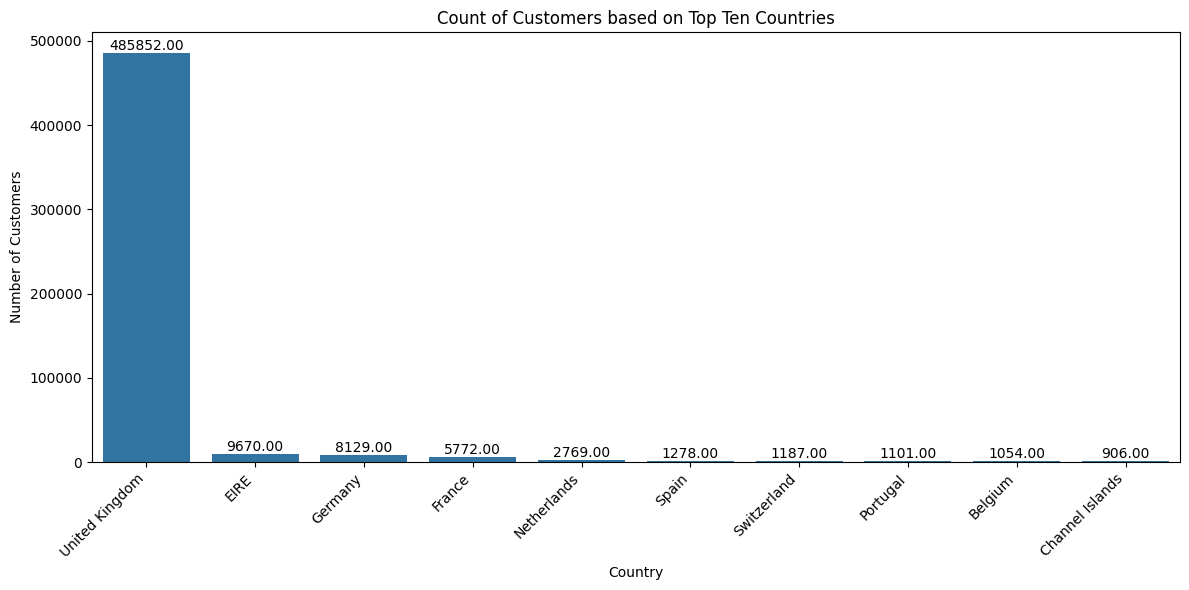

In [ ]:
df_ctry_count = df.groupby('Country')['Customer ID'].count().reset_index()
df_ctry_count = df_ctry_count.sort_values(by = 'Customer ID',ascending = False).head(10)

plt.figure(figsize=(12, 6))
ax=sns.barplot(x='Country', y='Customer ID', data=df_ctry_count)
plt.title('Count of Customers based on Top Ten Countries')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()


## **Correlation Analysis**


1.   Correlation between Price and Quantity
2.   COrrelation between



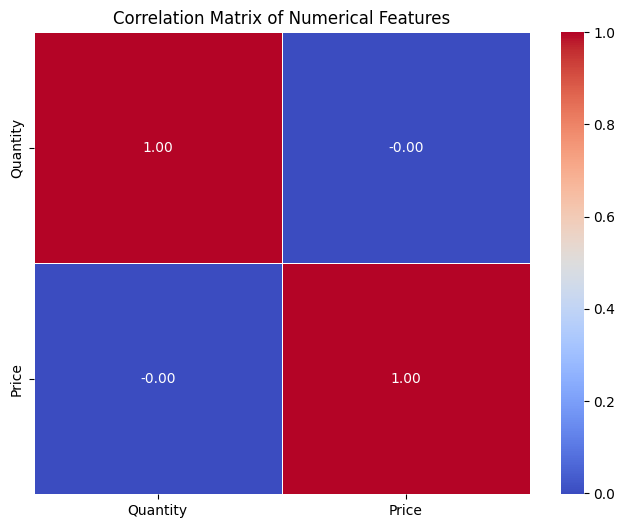

In [ ]:
# prompt: draw correlation matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis
numerical_cols = ['Quantity', 'Price']   # Add other relevant numerical columns

# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


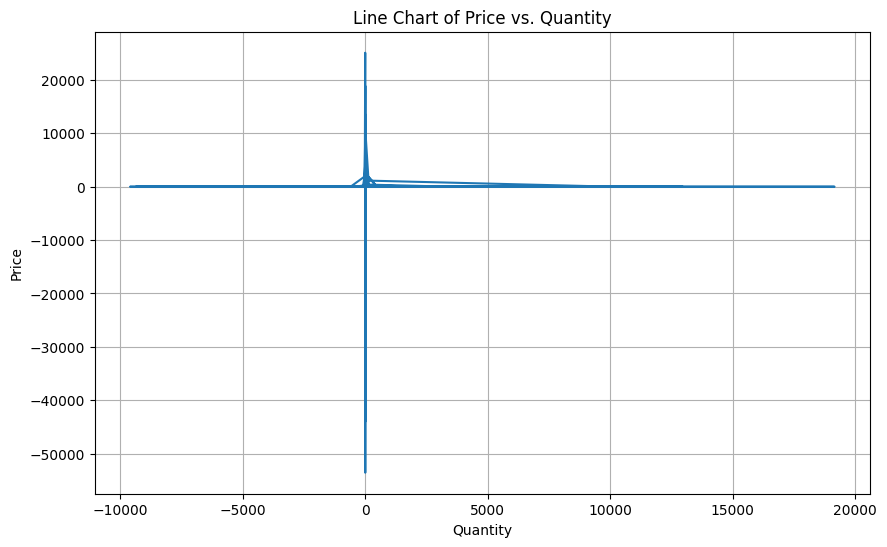

In [ ]:
# prompt: plot line chart between price and quantity

# Assuming 'df' is your DataFrame as defined in the previous code
# and it contains 'Quantity' and 'Price' columns.

plt.figure(figsize=(10, 6))
plt.plot(df['Quantity'], df['Price'])
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.title('Line Chart of Price vs. Quantity')
plt.grid(True)
plt.show()


### **Date Based Analysis**

In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]).dt.date

In [ ]:
df['InvoiceYear'] = pd.DatetimeIndex(df['InvoiceDate']).year


In [ ]:
df['InvoiceYear'].unique()

array([2009, 2010], dtype=int32)

In [ ]:
# prompt: plot  box plot year versus quantity with data label

# Assuming 'df' is your DataFrame as defined in the previous code
# and it contains 'InvoiceYear' and 'Quantity' columns.

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='InvoiceYear', y='Quantity', data=df)
plt.title('Box Plot of Quantity per Invoice Year')
plt.xlabel('Invoice Year')
plt.ylabel('Quantity')

# Add data labels to the box plot
for year in df['InvoiceYear'].unique():
    year_data = df[df['InvoiceYear'] == year]['Quantity']
    y_values = year_data.quantile([0.25, 0.5, 0.75]) # Get quartiles
    x_value = year

    plt.text(x_value, y_values[0.25], f'{y_values[0.25]:.2f}', ha='center', va='bottom')
    plt.text(x_value, y_values[0.5], f'{y_values[0.5]:.2f}', ha='center', va='bottom')
    plt.text(x_value, y_values[0.75], f'{y_values[0.75]:.2f}', ha='center', va='bottom')

plt.show()


Output hidden; open in https://colab.research.google.com to view.

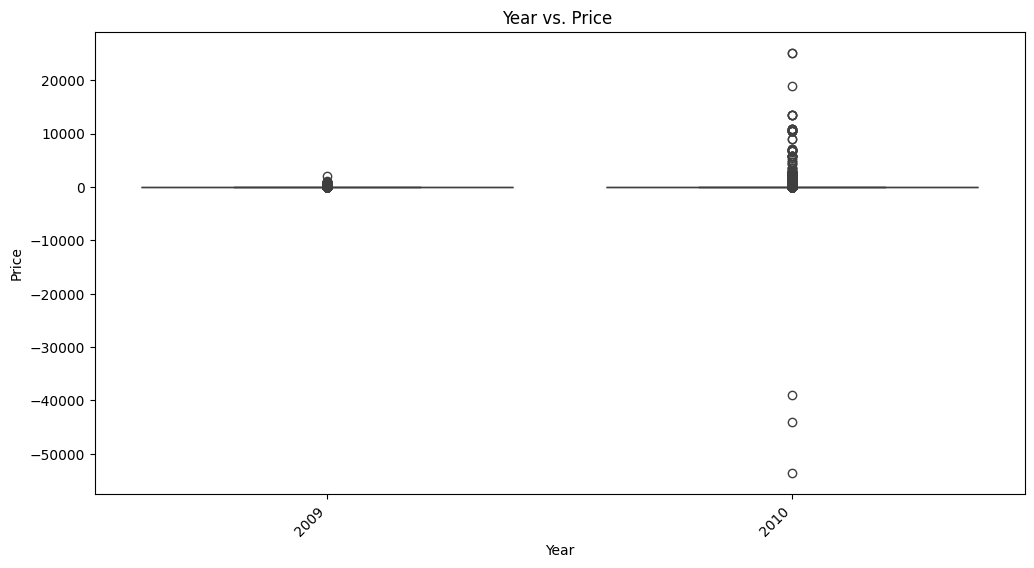

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='InvoiceYear', y='Price', data=df)
plt.title('Year vs. Price ')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()